<a href="https://colab.research.google.com/github/danielelbrecht/CAP5610-HW-1/blob/master/CAP5610_HW1Problem5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sklearn
from keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras import layers

#Load data
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


#Softmax classifier using Keras.  Additional features added to quantify images

In [0]:
#Preprocess data
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
#Define hyperparameters
learning_rate = 0.01
epochs = 10
classes = 10
batch_size = 100

#Use one-hot encoding
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)



In [0]:
#Function to calculate connected components in an image

  
#Connected components
def get_connected_components(image):
  
  n = 0
  labels = np.zeros(shape = (28, 28))
  
  
  #Assign a label to each pixel in image
  for i in range(28):
    for j in range(28):
      
      #If pixel is unlabeled, find every connected pixel and mark them as explored
      if labels[i][j] == 0 and image[i][j] == 0:
        
        n = n + 1
        x, y = i, j
        stack = [[i, j]]
        explored = []
        
        
        while stack != []:
          
          #get neighbors
          if [x,max(0,y-1)] not in explored and image[x][max(0,y-1)] == 0:
            stack.append([x,max(0,y-1)])
          if [x,min(27, y+1)] not in explored and image[x][min(27, y+1)] == 0:
            stack.append([x,min(27, y+1)])
          if [max(0, x-1),y] not in explored and image[max(0,x-1)][y] == 0:
            stack.append([max(0,x-1),y])
          if [min(27, x+1),y] not in explored and image[min(27, x+1)][y] == 0:
            stack.append([min(27, x+1),y])
          
          
          #Label pixel being popped from stack
          labels[x][y] = 1
          
          #Do updates
          temp = stack.pop()
          x = temp[0]
          y = temp[1]
          explored.append(temp)
          
          
        
  return n

In [5]:
#Modify data to include new features

train_images_modified = []

for i in range(10000):
  train_images_modified.append(np.append(train_images[i], get_connected_components(train_images_original[i])))
  
  if i % 1000 == 0:
    print(i ,"examples trained")
                                 
                                 


0 examples trained
1000 examples trained
2000 examples trained
3000 examples trained
4000 examples trained
5000 examples trained
6000 examples trained
7000 examples trained
8000 examples trained
9000 examples trained


In [0]:
#Convert data to np array
train_images_modified_array = np.asarray(train_images_modified)

#Define model
model = tf.keras.Sequential()

model.add(layers.Dense(classes, activation = 'softmax'))

model.compile(optimizer = tf.train.AdamOptimizer(learning_rate),
                            loss = 'categorical_crossentropy',
                            metrics=['accuracy'])

#Define model to test on regular data for comparison
model2 = tf.keras.Sequential()

model2.add(layers.Dense(classes, activation = 'softmax'))

model2.compile(optimizer = tf.train.AdamOptimizer(learning_rate),
                            loss = 'categorical_crossentropy',
                            metrics=['accuracy'])

In [18]:
#Training

new_model = model.fit(train_images_modified_array, train_labels[0:10000], epochs = epochs, batch_size = batch_size)


#Traning of other model for comparison
old_model = model2.fit(train_images[0:10000], train_labels[0:10000], epochs = epochs, batch_size = batch_size)

Epoch 1/10
10000/10000 [==============================] - 0s 37us/sample - loss: 0.5112 - acc: 0.8547
Epoch 2/10
10000/10000 [==============================] - 0s 28us/sample - loss: 0.2890 - acc: 0.9180
Epoch 3/10
10000/10000 [==============================] - 0s 27us/sample - loss: 0.2521 - acc: 0.9280
Epoch 4/10
10000/10000 [==============================] - 0s 30us/sample - loss: 0.2283 - acc: 0.9349
Epoch 5/10
10000/10000 [==============================] - 0s 28us/sample - loss: 0.2075 - acc: 0.9404
Epoch 6/10
10000/10000 [==============================] - 0s 28us/sample - loss: 0.1939 - acc: 0.9429
Epoch 7/10
10000/10000 [==============================] - 0s 30us/sample - loss: 0.1893 - acc: 0.9454
Epoch 8/10
10000/10000 [==============================] - 0s 27us/sample - loss: 0.1774 - acc: 0.9480
Epoch 9/10
10000/10000 [==============================] - 0s 25us/sample - loss: 0.1717 - acc: 0.9501
Epoch 10/10
10000/10000 [==============================] - 0s 28us/sample - loss: 

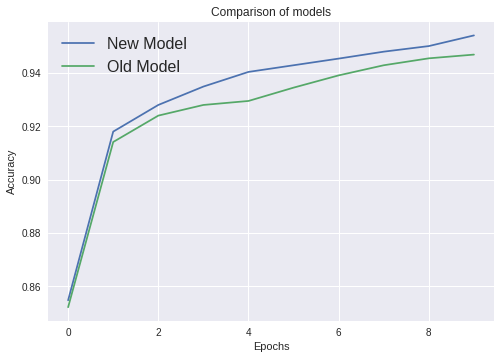

In [28]:
#Compare accuracy of models

import matplotlib as mpl
import matplotlib.pyplot as plt

index = []
for i in range(epochs):
  index.append(i)

plt.plot(index, new_model.history['acc'], label = "New Model")
plt.plot(index, old_model.history['acc'], label = "Old Model")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Comparison of models")
plt.show()